In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast

In [ ]:
click = pd.read_csv('/content/drive/MyDrive/archive_new/click.csv')
click.head(3)

,session_id,event_name,traffic_source,event_metadata,year
0,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,HOMEPAGE,MOBILE,NaN,2019
1,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,SCROLL,MOBILE,NaN,2019
2,7d440441-e67a-4d36-b324-80ffd636d166,HOMEPAGE,MOBILE,NaN,2019


In [ ]:
customer = pd.read_csv('/content/drive/MyDrive/archive_new/customer_data.csv')
customer.head(3)

,customer_id,gender,first_join_date,age
0,2870,F,2019-07-21,27
1,8193,F,2017-07-16,30
2,7279,M,2020-08-23,34


In [ ]:
transaction = pd.read_csv('/content/drive/MyDrive/archive_new/transaction_data.csv')
transaction.head(3)

,created_at,customer_id,session_id,product_metadata,payment_method,payment_status
0,2018-07-29T15:22:01.458193Z,5868,3abaa6ce-e320-4e51-9469-d9f3fa328e86,"[{'product_id': 54728, 'quantity': 1, 'item_pr...",Debit Card,Success
1,2018-07-30T12:40:22.365620Z,4774,2ee5ead1-f13e-4759-92df-7ff48475e970,"[{'product_id': 16193, 'quantity': 1, 'item_pr...",Credit Card,Success
2,2018-09-15T11:51:17.365620Z,4774,93325fb6-eb00-4268-bb0e-6471795a0ad0,"[{'product_id': 53686, 'quantity': 4, 'item_pr...",OVO,Success


In [ ]:
product = pd.read_csv('/content/drive/MyDrive/archive_new/product.csv',error_bad_lines=False)
product.head(3)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 6044: expected 10 fields, saw 11\nSkipping line 6569: expected 10 fields, saw 11\nSkipping line 7399: expected 10 fields, saw 11\nSkipping line 7939: expected 10 fields, saw 11\nSkipping line 9026: expected 10 fields, saw 11\nSkipping line 10264: expected 10 fields, saw 11\nSkipping line 10427: expected 10 fields, saw 11\nSkipping line 10905: expected 10 fields, saw 11\nSkipping line 11373: expected 10 fields, saw 11\nSkipping line 11945: expected 10 fields, saw 11\nSkipping line 14112: expected 10 fields, saw 11\nSkipping line 14532: expected 10 fields, saw 11\nSkipping line 15076: expected 10 fields, saw 12\nSkipping line 29906: expected 10 fields, saw 11\nSkipping line 31625: expected 10 fields, saw 11\nSkipping line 33020: expected 1

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch


# EDA

### clicksteam

In [ ]:
click.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12833602 entries, 0 to 12833601
Data columns (total 5 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   session_id      object
 1   event_name      object
 2   traffic_source  object
 3   event_metadata  object
 4   year            int64 
dtypes: int64(1), object(4)
memory usage: 489.6+ MB


In [ ]:
click.isnull().sum()

session_id              0
event_name              0
traffic_source          0
event_metadata    8544062
year                    0
dtype: int64

In [ ]:
# 모바일과 웹 카운트
tf_source = click[['traffic_source']].value_counts(normalize = True) * 100
tf_source = pd.DataFrame(tf_source)
tf_source.reset_index(inplace = True)
tf_source.rename(columns = {0:'percentage'}, inplace = True)

In [ ]:
tf_source

,traffic_source,percentage
0,MOBILE,89.984901
1,WEB,10.015099


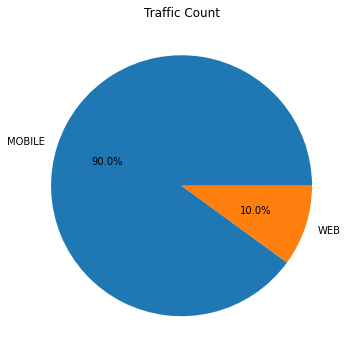

In [ ]:
plt.figure(figsize=(10,6))
plt.pie(tf_source['percentage'], labels = tf_source['traffic_source'],autopct='%.1f%%')
plt.title('Traffic Count')
plt.show()

In [ ]:
click.event_name.unique()

array(['HOMEPAGE', 'SCROLL', 'ADD_TO_CART', 'BOOKING', 'SEARCH',
       'ITEM_DETAIL', 'ADD_PROMO', 'CLICK', 'PROMO_PAGE'], dtype=object)

In [ ]:
booking_year = click[click['event_name'] == 'BOOKING'].groupby('year', as_index = False)['event_name'].count().sort_values('year')

In [ ]:
booking_year

,year,event_name
0,2016,4833
1,2017,34111
2,2018,73127
3,2019,116794
4,2020,172908
5,2021,256214
6,2022,194595


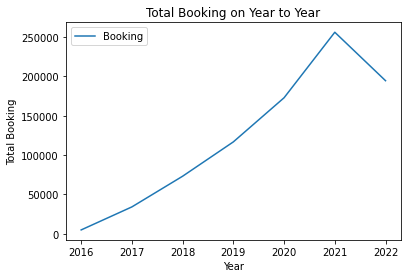

In [ ]:
plt.plot('year', 'event_name', data = booking_year, label = 'Booking')

plt.title('Total Booking on Year to Year')
plt.xlabel('Year')
plt.ylabel('Total Booking')
plt.legend()
plt.show()

In [ ]:
traffic_year = click.groupby(['year', 'traffic_source'], as_index = False)['event_name'].count().sort_values('year', ascending = False)
traffic_year

,year,traffic_source,event_name
12,2022,MOBILE,2695376
13,2022,WEB,297895
10,2021,MOBILE,3437818
11,2021,WEB,381863
8,2020,MOBILE,2311240
9,2020,WEB,257572
6,2019,MOBILE,1568989
7,2019,WEB,175632
4,2018,MOBILE,988365
5,2018,WEB,110949


In [ ]:
mobile = traffic_year[traffic_year['traffic_source'] == 'MOBILE'][['event_name']].sort_values('event_name',ascending=False)
web = traffic_year[traffic_year['traffic_source'] == 'WEB'][['event_name']].sort_values('event_name',ascending=False)

In [ ]:
year = traffic_year['year'].unique()
year

array([2022, 2021, 2020, 2019, 2018, 2017, 2016])

In [ ]:
mobile

,event_name
10,3437818
12,2695376
8,2311240
6,1568989
4,988365
2,475599
0,70917


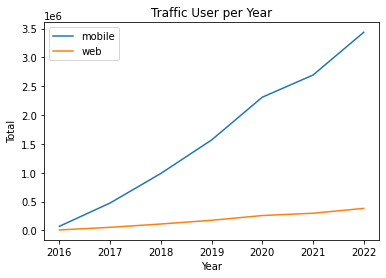

In [ ]:
plt.plot(year, mobile, label = 'mobile')
plt.plot(year, web, label = 'web')

plt.title('Traffic User per Year')
plt.xlabel('Year')
plt.ylabel('Total')
plt.legend()

plt.show()

EDA 결과
1. booking의 경우 매년 증가하다가 2021년부터 하락세를 보임.
2. 모바일 사용자의 수가 매년 증가함을 보임. 

# 통계적 분석
### 판매량 순, 최근 거래일 순으로 추천

In [ ]:
payment = transaction[['session_id','payment_status']]

In [ ]:
bb = click[click['event_name'] == 'ADD_TO_CART'].reset_index(drop=True)

In [ ]:
df = pd.merge(bb,payment, on ='session_id')
df.head()

,session_id,event_name,traffic_source,event_metadata,year,payment_status
0,7d440441-e67a-4d36-b324-80ffd636d166,ADD_TO_CART,MOBILE,"{'product_id': 15315, 'quantity': 4, 'item_pri...",2019,Success
1,f7b5cd60-4f87-4b3c-8bde-c7da8930eec2,ADD_TO_CART,MOBILE,"{'product_id': 6133, 'quantity': 2, 'item_pric...",2019,Success
2,f7b5cd60-4f87-4b3c-8bde-c7da8930eec2,ADD_TO_CART,MOBILE,"{'product_id': 6721, 'quantity': 1, 'item_pric...",2019,Success
3,f7b5cd60-4f87-4b3c-8bde-c7da8930eec2,ADD_TO_CART,MOBILE,"{'product_id': 57622, 'quantity': 1, 'item_pri...",2019,Success
4,f7b5cd60-4f87-4b3c-8bde-c7da8930eec2,ADD_TO_CART,MOBILE,"{'product_id': 5490, 'quantity': 1, 'item_pric...",2019,Success


In [ ]:
df2 = df[df.payment_status == 'Success']
df2.head()

,session_id,event_name,traffic_source,event_metadata,year,payment_status
0,7d440441-e67a-4d36-b324-80ffd636d166,ADD_TO_CART,MOBILE,"{'product_id': 15315, 'quantity': 4, 'item_pri...",2019,Success
1,f7b5cd60-4f87-4b3c-8bde-c7da8930eec2,ADD_TO_CART,MOBILE,"{'product_id': 6133, 'quantity': 2, 'item_pric...",2019,Success
2,f7b5cd60-4f87-4b3c-8bde-c7da8930eec2,ADD_TO_CART,MOBILE,"{'product_id': 6721, 'quantity': 1, 'item_pric...",2019,Success
3,f7b5cd60-4f87-4b3c-8bde-c7da8930eec2,ADD_TO_CART,MOBILE,"{'product_id': 57622, 'quantity': 1, 'item_pri...",2019,Success
4,f7b5cd60-4f87-4b3c-8bde-c7da8930eec2,ADD_TO_CART,MOBILE,"{'product_id': 5490, 'quantity': 1, 'item_pric...",2019,Success


In [ ]:
# df의 event metadata 칼럼만 뽑아서 새 데이터프레임으로 만드는 함수
def metadata_df(df):
    search_id = df[['event_metadata']]
    search_id.set_index('event_metadata', inplace = True)

    list_product_id = []
    for index, value in search_id.iterrows():
        list_product_id.append(index)

    dict_search_id = []
    # 파이썬 추상 구문 문법의 트리를 처리
    for i in list_product_id:
        dict_search_id.append(ast.literal_eval(i))

    df_cb = pd.DataFrame(dict_search_id)[['product_id','quantity']]
    return df_cb

In [ ]:
df_cb = metadata_df(df2)
df_cb

,product_id,quantity
0,15315,4
1,6133,2
2,6721,1
3,57622,1
4,5490,1
...,...,...
1813231,4869,1
1813232,25127,1
1813233,19386,1
1813234,13143,1


In [ ]:
cb_data = pd.merge(df_cb, product, left_on='product_id',right_on= 'id')
cb_data

,product_id,quantity,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15315,4,15315,Men,Footwear,Shoes,Sports Shoes,Black,Fall,2011.0,Sports,ADIDAS Men Eqt Nitro Fashion Black Sports Shoes
1,15315,1,15315,Men,Footwear,Shoes,Sports Shoes,Black,Fall,2011.0,Sports,ADIDAS Men Eqt Nitro Fashion Black Sports Shoes
2,15315,1,15315,Men,Footwear,Shoes,Sports Shoes,Black,Fall,2011.0,Sports,ADIDAS Men Eqt Nitro Fashion Black Sports Shoes
3,15315,1,15315,Men,Footwear,Shoes,Sports Shoes,Black,Fall,2011.0,Sports,ADIDAS Men Eqt Nitro Fashion Black Sports Shoes
4,15315,1,15315,Men,Footwear,Shoes,Sports Shoes,Black,Fall,2011.0,Sports,ADIDAS Men Eqt Nitro Fashion Black Sports Shoes
...,...,...,...,...,...,...,...,...,...,...,...,...
1812590,4394,1,4394,Men,Apparel,Topwear,Tshirts,Grey,Summer,2011.0,Casual,Free Authority Men's Panda Cigar Grey T-shirt
1812591,4394,1,4394,Men,Apparel,Topwear,Tshirts,Grey,Summer,2011.0,Casual,Free Authority Men's Panda Cigar Grey T-shirt
1812592,4394,1,4394,Men,Apparel,Topwear,Tshirts,Grey,Summer,2011.0,Casual,Free Authority Men's Panda Cigar Grey T-shirt
1812593,4394,1,4394,Men,Apparel,Topwear,Tshirts,Grey,Summer,2011.0,Casual,Free Authority Men's Panda Cigar Grey T-shirt


# CB 모델

In [ ]:
# cb 모델 위해 다시 데이터 양 조절
cb_product = cb_data.groupby(['product_id','articleType','productDisplayName'])['quantity'].count().reset_index()
cb_product

,product_id,articleType,productDisplayName,quantity
0,1163,Tshirts,Nike Sahara Team India Fanwear Round Neck Jersey,27
1,1164,Tshirts,Nike Men Blue T20 Indian Cricket Jersey,21
2,1165,Tshirts,Nike Mean Team India Cricket Jersey,29
3,1525,Backpacks,Puma Deck Navy Blue Backpack,96
4,1526,Backpacks,Puma Big Cat Backpack Black,92
...,...,...,...,...
44412,59995,Dresses,Avirate Black Dress,79
44413,59996,Dresses,Avirate Black & Purple Dress,95
44414,59998,Heels,Catwalk Women Multi Coloured Heels,84
44415,59999,Heels,Catwalk Women Bronze Wedges,84


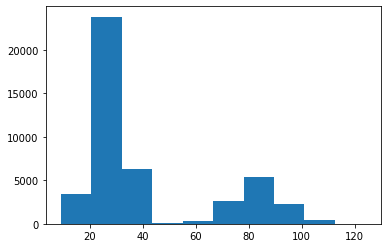

In [ ]:
plt.hist(cb_product.quantity)
plt.show()

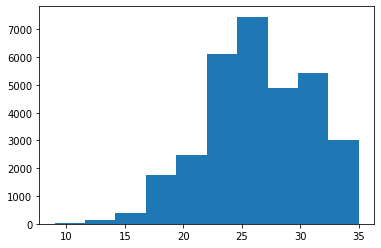

In [ ]:
plt.hist(cb_product[cb_product.quantity<=35].quantity)
plt.show()

In [ ]:
# quantity가 너무 적은 데이터는 삭제한 최종 데이터

cb_product2 = cb_product[cb_product.quantity >= 30]

# 중복 데이터 삭제
cb_product2.productDisplayName=cb_product2.productDisplayName.drop_duplicates()
cb_product2=cb_product2.dropna()
cb_product2

In [ ]:
customer_transaction = pd.read_csv('/content/drive/MyDrive/archive_new/customer_transaction.csv')
customer_transaction.head()

,customer_id,date,time,product_id
0,3,2022-06-26,15:41:52,22990
1,8,2022-05-15,22:46:22,13513
2,9,2022-05-28,08:44:32,8667
3,11,2022-03-07,14:29:13,21536
4,15,2022-01-05,06:07:58,10569


In [ ]:
# userid, product name, quantity 합친 데이터프레임

customer_merge = pd.merge(customer_transaction,cb_product, on = 'product_id', how='left')
customer_merge

,customer_id,date,time,product_id,articleType,productDisplayName,quantity
0,3,2022-06-26,15:41:52,22990,Socks,2go Active Gear USA Men Pack of Two Cushion Socks,28.0
1,8,2022-05-15,22:46:22,13513,Tshirts,Chimp Men Firee Grey Tshirts,32.0
2,9,2022-05-28,08:44:32,8667,Sunglasses,Fastrack Men Gradient Bikers Sunglasses P148BR2,34.0
3,11,2022-03-07,14:29:13,21536,Handbags,Kiara Women Classic Dark Pink Handbag,86.0
4,15,2022-01-05,06:07:58,10569,Tops,Puma Women Ess White Polo Tshirts,32.0
...,...,...,...,...,...,...,...
50237,99992,2022-05-25,09:32:49,7370,Sandals,Red Tape Men Stone Brown Floater,22.0
50238,99995,2022-07-29,03:54:17,11701,Shirts,Lee Men Check White Shirts,19.0
50239,99997,2020-04-25,18:38:16,48126,Belts,Fossil Women Brown Skinny Mini Belt,30.0
50240,99998,2022-01-25,00:54:09,45294,Watches,CASIO SHEEN Women Black Dial Watch SX041,21.0


In [ ]:
# userid 넣으면 해당 유저의 최근 거래 물품을 토대로 tfidf 이용하여 물품 추천

def data_similarity(df, userid,top=20):
    from sklearn.feature_extraction.text import TfidfVectorizer
    from sklearn.metrics.pairwise import cosine_similarity

    # tfidf로 코사인 유사도를 구함
    tfidf = TfidfVectorizer()
    product_tfidf = tfidf.fit_transform(df['productDisplayName'])
    product_similarity = cosine_similarity(product_tfidf,product_tfidf)


    product_sim = {}
    for i, c in enumerate(df['productDisplayName']): 
        product_sim[i] = c

    # id와 movie title를 매핑할 dictionary를 생성
    idproduct = {}
    for i, c in product_sim.items():
        idproduct[c] = i

    product_name = customer_merge[customer_merge['customer_id']==userid]['productDisplayName'].values[0]
    
    idx = idproduct[product_name] 
    sim_scores = [(i, c) for i, c in enumerate(product_similarity[idx]) if i != idx] # 자기 자신을 제외한 유사도 및 인덱스를 추출 
    sim_scores = sorted(sim_scores, key = lambda x: x[1], reverse=True) # 유사도가 높은 순서대로 정렬 
    sim_scores = [(product_sim[i], score) for i, score in sim_scores[0:top]]
    product_topsim = pd.DataFrame(sim_scores)
    product_topsim.columns = ['productDisplayName','similarity']
    return product_topsim

In [ ]:
data_sim = data_similarity(cb_product2, 23071) 
data_sim

,productDisplayName,similarity
0,ADIDAS Men Red Jersey,0.582805
1,Nike Men Black Jersey,0.492195
2,ADIDAS Men Black Jersey,0.487247
3,ADIDAS Men Blue Jersey,0.478496
4,Baggit Women Roxy Net Black Handbag,0.466709
5,Nike Men Green Jersey,0.461352
6,Baggit Women Roxy Net Brown Handbag,0.458205
7,ADIDAS Men Printed Blue Jersey,0.435937
8,ADIDAS Men Solid Black Jersey,0.426816
9,ADIDAS Men Solid Blue Jersey,0.420897


In [ ]:
# baseline
baseline = [cb_product2['quantity'].mode()[0]] * len(cb_product2['quantity'])

from sklearn.metrics import accuracy_score

print(" accuracy: ", accuracy_score(cb_product2['quantity'], baseline).round(2))

 accuracy:  0.11


In [ ]:
# 평가지표 precision@k, recall@k

def compute_precision_recall(targets, predictions, k):
      """
      predictions : 모델을 통해 사용자가 어떤 아이템에 관심이 있을지 예측한 데이터
      targets : 실제로 사용자가 관심있는 아이템인지 확인하기 위한 데이터
      k : 추천 수
      """
      pred = predictions[:k]
      num_hit = len(set(pred).intersection(set(targets)))
      
      precision_k = float(num_hit) / len(pred)
      recall_k = float(num_hit) / len(targets)

      return precision_k, recall_k

In [ ]:
compute_precision_recall(cb_product2, data_sim, 5)

(0.2, 6.190800470500836e-05)

### transaction 데이터에서 payment 성공한 데이터 중 날짜, product_metadata, customer_id  추출하는 과정

In [ ]:
# # created_at 에서 날짜 추출
# aa = transaction[transaction.payment_status=='Success'].reset_index(drop=True)
# aa.head()

In [ ]:
# b = aa['created_at'].str.split('.',expand=True)
# b.rename(columns = {0 : 'date',1 : 'times'}, inplace = True)

In [ ]:
# c = b['date'].str.split('T',expand=True)
# c=c.rename(columns={0:'date',1:'time'})

In [ ]:
# aaa = pd.concat([aa,c], axis=1)
# aaa.head()

In [ ]:
# # product_metadat에서 product_id 추출
# d = aa['product_metadata'].str.split(',',expand=True)

In [ ]:
# dd = pd.DataFrame(d[0])
# dd = dd.rename(columns={0:'product_id'})

In [ ]:
# dd['product_id'] = dd['product_id'].str[-5:]
# dd.head()

In [ ]:
# abc = pd.concat([aaa,dd],axis=1)
# abc

In [ ]:
#new_transaction = abc[['customer_id','date','time','product_id']]
#new_transaction.info()

In [ ]:
# new_transaction['date'] = pd.to_datetime(new_transaction['date'])
# new_transaction = new_transaction.sort_values(['date','time'],ascending=[False,False])
# new_transaction.head()

In [ ]:
# re = new_transaction.groupby('customer_id')['date','time'].max().reset_index()
# re.head()

In [ ]:
# customer_transaction = pd.merge(re, new_transaction, on = ['customer_id','date'],how='left')
# customer_transaction = customer_transaction.drop_duplicates('customer_id')

In [ ]:
# customer_transaction=customer_transaction.drop('time_x',axis=1)
# customer_transaction = customer_transaction.rename(columns={'time_y':'time'})
# customer_transaction.head()

In [ ]:
#customer_transaction.to_csv('customer_transaction.csv',index=False)